## Wheat and chess board problem

#### Sample Code

In [53]:
import numpy as np

n_squares = 4
small_board_list = [1]
for _ in range(n_squares - 1):
    small_board_list.append(2*small_board_list[-1])
print("Arrange wheat on a plate of 4 squares (list): {}".format(small_board_list))

small_board_ndarray = np.array(small_board_list)
print("Arrange wheat on a plate of 4 squares (ndarray): {}".format(small_board_ndarray))

Arrange wheat on a plate of 4 squares (list): [1, 2, 4, 8]
Arrange wheat on a plate of 4 squares (ndarray): [1 2 4 8]


### Problem 1: Number of wheat on a 2 x 2 square chess board


In [54]:
from numpy import ndarray

def reshape_ndarray_to(_new_shape: tuple, _ndarray: ndarray) -> ndarray:
    return _ndarray.reshape(_new_shape)

print(reshape_ndarray_to((2,2), small_board_ndarray))

[[1 2]
 [4 8]]


### Problem 2: Expansion to n × m mass

In [55]:
def generate_board(_board_shape: tuple) -> ndarray:
    _board = np.array([1], dtype=np.float64) # The second argument helps to solve the following error "RuntimeWarning: overflow encountered in long_scalars"
    for i in range(_board_shape[0] * _board_shape[1] - 1):
        _board = np.append(_board, [_board[-1] * 2])
    return _board.reshape(_board_shape)

board = generate_board(_board_shape=(8, 8))
for row in board:
    print(row)

[  1.   2.   4.   8.  16.  32.  64. 128.]
[  256.   512.  1024.  2048.  4096.  8192. 16384. 32768.]
[  65536.  131072.  262144.  524288. 1048576. 2097152. 4194304. 8388608.]
[1.67772160e+07 3.35544320e+07 6.71088640e+07 1.34217728e+08
 2.68435456e+08 5.36870912e+08 1.07374182e+09 2.14748365e+09]
[4.29496730e+09 8.58993459e+09 1.71798692e+10 3.43597384e+10
 6.87194767e+10 1.37438953e+11 2.74877907e+11 5.49755814e+11]
[1.09951163e+12 2.19902326e+12 4.39804651e+12 8.79609302e+12
 1.75921860e+13 3.51843721e+13 7.03687442e+13 1.40737488e+14]
[2.81474977e+14 5.62949953e+14 1.12589991e+15 2.25179981e+15
 4.50359963e+15 9.00719925e+15 1.80143985e+16 3.60287970e+16]
[7.20575940e+16 1.44115188e+17 2.88230376e+17 5.76460752e+17
 1.15292150e+18 2.30584301e+18 4.61168602e+18 9.22337204e+18]


### Problem 3: Total number of wheat

##### Total number of wheat

In [56]:
total_number_of_wheat = np.sum(board)
print(f"The total number of wheat is: {total_number_of_wheat}")

The total number of wheat is: 1.8446744073709552e+19


##### Average wheat in each column

In [57]:
def compute_column_average(_column_index: int, _board: ndarray): # '_board' must be 2D
    _column_elements: ndarray = np.array([])
    for row in _board:
        # print(row[_column_index])
        _column_elements = np.append(_column_elements, [row[_column_index]])
    return np.mean(_column_elements)

def compute_average_by_column(_board: ndarray) -> ndarray:
    _num_of_columns = _board.shape[0]
    _average_by_column: ndarray = np.array([])
    for _column in range(_num_of_columns):
        # print(_column)
        _average_by_column = np.append(_average_by_column, [compute_column_average(_column, _board)])
    return _average_by_column

average_wheat_by_column = compute_average_by_column(board)
print(f"The wheat average by column is {average_wheat_by_column}")

The wheat average by column is [9.04252160e+15 1.80850432e+16 3.61700864e+16 7.23401728e+16
 1.44680346e+17 2.89360691e+17 5.78721383e+17 1.15744277e+18]


##### Plottig the average wheat in each column of the board

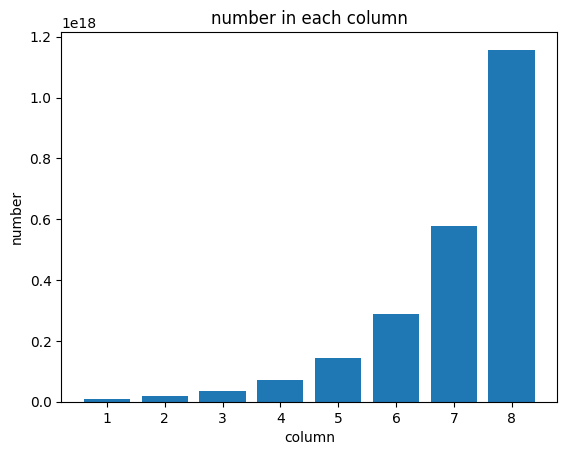

In [58]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.xlabel("column")
plt.ylabel("number")
plt.title("number in each column")
plt.bar(np.arange(1, 9), average_wheat_by_column)
plt.show()

### Problem 4: Heat map of the number of wheat

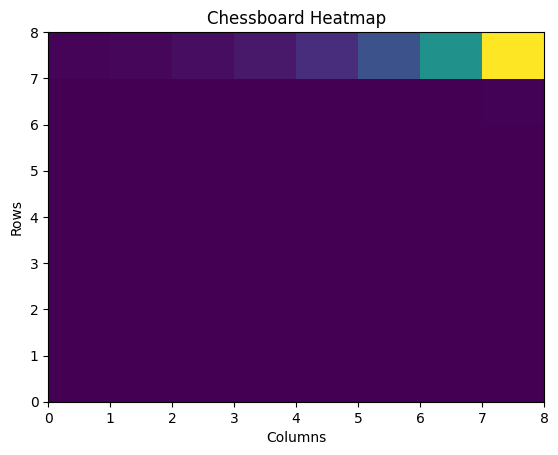

In [59]:
plt.xlabel("Columns")
plt.ylabel("Rows")
plt.title("Chessboard Heatmap")
plt.pcolor(board)
plt.show()

#### Problem 5: How many times is the second half as long as the first half?

In [60]:
first_board_half = board[0:3]
second_board_half = board[4:7]

first_board_half_size = np.sum(first_board_half)
second_board_half_size = np.sum(second_board_half)

print(f"The first board half size is {first_board_half_size}")
print(f"The second board half size is {second_board_half_size}")
print(f"The second half is {second_board_half_size / first_board_half_size} times larger than the first half")


The first board half size is 16777215.0
The second board half size is 7.205758974296064e+16
The second half is 4294967296.0 times larger than the first half


#### Problem 6: Expansion to n × m mass by another calculation method

In [61]:
# Using numpy broadcast to generate the board
def generate_board1(_board_shape: tuple) -> np.ndarray:
    indices = np.arange(_board_shape[0] * _board_shape[1])
    _board = 2 ** indices
    return _board.reshape(_board_shape)

# Using numpy append to generate the board
def generate_board2(_board_shape: tuple) -> np.ndarray:
    _board = np.array([1], dtype=np.float64)
    for i in range(_board_shape[0] * _board_shape[1] - 1):
        _board = np.append(_board, [_board[-1] * 2])
    return _board.reshape(_board_shape)


#### Problem 7: Comparing calculation times

In [62]:
# Executing the functions multiple times to see the execution time using the magic command %timeit
print("The time using numpy broadcast:")
%timeit generate_board1((8, 8))

print("The time using numpy append:")
%timeit generate_board2((8, 8))


The time using numpy broadcast:
3.3 µs ± 179 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
The time using numpy append:
413 µs ± 36.1 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
